<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Module-1-Class-activities" data-toc-modified-id="Module-1-Class-activities-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Module 1 Class activities</a></span><ul class="toc-item"><li><span><a href="#Using-the-requests-library-to-query-an-API" data-toc-modified-id="Using-the-requests-library-to-query-an-API-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Using the <code>requests</code> library to query an API</a></span></li><li><span><a href="#Accessing-census-data" data-toc-modified-id="Accessing-census-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Accessing census data</a></span></li><li><span><a href="#Using-Socrata" data-toc-modified-id="Using-Socrata-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Using Socrata</a></span></li><li><span><a href="#What-you-should-have-learned" data-toc-modified-id="What-you-should-have-learned-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>What you should have learned</a></span></li></ul></li></ul></div>

## Module 1 Class activities
This notebook is a starting point for the exercises and activities that we'll do in class.

Before you attempt any of these activities, make sure to watch the Module 1 video lectures.

### Using the `requests` library to query an API
Here's the code that we saw in the video lecture that queries BART for real-time arrivals.

In [1]:
import json
import pandas as pd
import requests

APIkey = 'MW9S-E7SL-26DU-VV8V'  # the key posted on BART's website
station = 'CIVC'
requestString = 'http://api.bart.gov/api/etd.aspx?cmd=etd&orig={}&json=y&key={}'.format(station, APIkey)
r = requests.get(requestString)
d = json.loads(r.text)
etd = d['root']['station'][0]['etd']
print('Trains from {} to {}'.format(station, etd[0]['destination']))
df = pd.DataFrame(etd[0]['estimate'])
df

Trains from CIVC to Antioch


,minutes,platform,direction,length,color,hexcolor,bikeflag,delay,cancelflag,dynamicflag
0,5,2,North,10,YELLOW,#ffff33,1,346,0,0
1,15,2,North,10,YELLOW,#ffff33,1,89,0,0
2,29,2,North,10,YELLOW,#ffff33,1,0,0,0


<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Explore the different objects. What are <strong>r</strong>, <strong>d</strong>, and <strong>etd</strong>. What can you do with them?
</div>

Hint: Use `type()` to find out the type of an object (e.g. `type(r)`), and `?` to pull up the help screen (e.g. `r?`).

You can also tab autocomplete to discover an object's attributes and methods (e.g. `r.` and then `TAB`). 

In [2]:
type(r)

requests.models.Response

In [3]:
type(d)

dict

In [4]:
type(etd)

list

Now let's explore the other options and API commands that BART offers. 

The API documentation for the `etd` (real-time information) command is [here](https://api.bart.gov/docs/etd/etd.aspx). 

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Write a command to retrieve real-time departures for southbound trains at Civic Center station (code: CIVC). Hint: You'll need to add another <strong>&</strong> to <strong>requestString</strong>.
</div>

In [5]:
# Command for southbound trains at Civic Center station 
APIkey = 'MW9S-E7SL-26DU-VV8V'  # the key posted on BART's website
station = 'CIVC'
requestString = 'http://api.bart.gov/api/etd.aspx?cmd=etd&orig={}&json=y&key={}&dir=s'.format(station, APIkey)
r_south = requests.get(requestString)

<div class="alert alert-block alert-info">
    <strong>Exercise:</strong> Use the <strong>elev</strong> command to obtain the elevator status at each station, and put it in a dataframe. Optional extension: pass the parameters as a dictionary to requests, as we saw in the video lecture.

See the API docs [here](https://api.bart.gov/docs/bsa/elev.aspx) for details of that command.

In [6]:
APIkey = 'MW9S-E7SL-26DU-VV8V'  # the key posted on BART's website
station = 'CIVC'
requestString = 'https://api.bart.gov/api/bsa.aspx?cmd=elev&key={}&json=y'.format(APIkey)
r = requests.get(requestString)
d = json.loads(r.text)

In [7]:
print((d['root'].keys()))

dict_keys(['@id', 'uri', 'date', 'time', 'bsa', 'message'])


In [8]:
d['root']['bsa']

[{'@id': '04100310',
  'station': 'BART',
  'type': 'ELEVATOR',
  'description': {'#cdata-section': 'There is 1 elevator out of service at this time: NBRK: Station'},
  'sms_text': {'#cdata-section': '1 elev out of svc: NBRK: stn'},
  'posted': '',
  'expires': ''}]

In [9]:
import pandas as pd
df = pd.DataFrame(d['root']['bsa'])

In [10]:
df

,@id,station,type,description,sms_text,posted,expires
0,04100310,BART,ELEVATOR,{'#cdata-section': 'There is 1 elevator out of...,{'#cdata-section': '1 elev out of svc: NBRK: s...,,


### Accessing census data

Recall that we have seen two ways to access census data:
* The Census Bureau API
* The `cenpy` library

Let's try them both and map patterns of race for Los Angeles County. 

Here's the relevant code that we saw in the video lecture to get the 5-year ACS estimates for population (table `B01001_001E`).

In [11]:
import json
import requests
import pandas as pd

r = requests.get('https://api.census.gov/data/2015/acs/acs5?get=B01001_001E&for=county')
censusdata = r.json()
df = pd.DataFrame(censusdata[1:], columns=censusdata[0])
df.head()

,B01001_001E,state,county
0,7059,48,075
1,119632,48,091
2,22949,48,225
3,48118,48,349
4,17238,48,415


<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Retrieve population data at the census tract level for LA County, and put it in a pandas dataframe. (You can use the 5-year ACS if you like.)
</div>

Some examples are given [here](https://api.census.gov/data/2015/acs/acs5/examples.html). 

Note that you don't need the API key for a small number of queries, so you can delete `&key=YOUR_KEY_GOES_HERE` from the examples. 

The FIPS code for California is `06` and for Los Angeles County `037`.

In [60]:
# Retrieve population data at census tract level for LA County 
state= '06' # California
county= '037' # LA county
population = requests.get('https://api.census.gov/data/2015/acs/acs5?get=NAME,B00001_001E&for=tract:*&in=state:{}&in=county:{}'.format(state, county))
pop_censusdata = population.json()
df_1 = pd.DataFrame(pop_censusdata[1:], columns=pop_censusdata[0])
df_1.rename(columns = {'B00001_001E':'population'}, inplace=True)
df_1.dropna
df_1.head()

,NAME,population,state,county,tract
0,"Census Tract 5301.02, Los Angeles County, Cali...",422,06,037,530102
1,"Census Tract 1046.10, Los Angeles County, Cali...",436,06,037,104610
2,"Census Tract 1065.10, Los Angeles County, Cali...",420,06,037,106510
3,"Census Tract 1066.41, Los Angeles County, Cali...",341,06,037,106641
4,"Census Tract 1132.13, Los Angeles County, Cali...",398,06,037,113213


<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Retrieve the census data for race/ethnicity for tracts in Los Angeles county, and put it in a pandas dataframe. 
</div>

Hints:
* The list of variables is [here](https://api.census.gov/data/2015/acs/acs5/variables.html).
* The data is crosstabulated by race and age and gender. If you just want race/ethnicity, then look at the `Estimate!!Total:` variables. For example, `B01001H_001E` gives the total number of non-Hispanic white people, without further disaggregating by gender and age. 
* Start with the simplest measure of race. For example, you could calculate the proportion of Black people or non-Hispanic white people in each census tract, by dividing the relevant variable by the total population (which you already retrieved above).
* You can request multiple variables at once - just separate them with commas. For example, `get=NAME,B01001_001E,B01001H_001E`. 
* `NAME` means that you are requesting the description of the geography - this is optional.


In [116]:
# Retrieve census data for race/ethnicity for tracts in LA county 
census_race_variables=['B01001H_001E', 'B01001I_001E', 'B02001_003E','B02001_004E', 'B02001_005E', 'B02001_006E', 'B02001_007E', 'B02001_008E']
census_race_names= ['White', 'Hispanic/Latino', 'Black', 'AIAN', 'Asian', 'NHPI', 'Other Race', 'Multiracial']
request_racedata = requests.get('https://api.census.gov/data/2015/acs/acs5?get=NAME,B01001_001E,B01001H_001E,B01001I_001E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E&for=tract:*&in=state:{}&in=county:{}'.format(state, county))
race_censusdata = request_racedata.json()
df_2 = pd.DataFrame(race_censusdata[1:], columns=race_censusdata[0])
df_2.dropna
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NAME          2346 non-null   object
 1   B01001_001E   2346 non-null   object
 2   B01001H_001E  2346 non-null   object
 3   B01001I_001E  2346 non-null   object
 4   B02001_003E   2346 non-null   object
 5   B02001_004E   2346 non-null   object
 6   B02001_005E   2346 non-null   object
 7   B02001_006E   2346 non-null   object
 8   B02001_007E   2346 non-null   object
 9   B02001_008E   2346 non-null   object
 10  state         2346 non-null   object
 11  county        2346 non-null   object
 12  tract         2346 non-null   object
dtypes: object(13)
memory usage: 238.4+ KB


In [117]:
# so to calculate the percentage, we first convert to a float.
# integer will not work here as it cannot hold NaN (missing data)
df_2['pc_nonHispanicWhite'] = df_2.B01001H_001E.astype(float) / df_2.B01001_001E.astype(float) * 100 
df_2.head()

,NAME,B01001_001E,B01001H_001E,B01001I_001E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E,state,county,tract,pc_nonHispanicWhite
0,"Census Tract 5301.02, Los Angeles County, Cali...",5308,957,3895,60,69,330,0,606,230,06,037,530102,18.029390
1,"Census Tract 1046.10, Los Angeles County, Cali...",3385,41,3339,0,0,0,0,995,79,06,037,104610,1.211226
2,"Census Tract 1065.10, Los Angeles County, Cali...",5151,966,3575,270,0,304,0,877,115,06,037,106510,18.753640
3,"Census Tract 1066.41, Los Angeles County, Cali...",2145,1350,231,29,0,433,0,23,132,06,037,106641,62.937063
4,"Census Tract 1132.13, Los Angeles County, Cali...",4714,2118,1433,169,7,708,0,722,347,06,037,113213,44.929996


In [120]:
df_2.rename(columns = {'B01001H_001E':'% White','B01001I_001E':'% Hispanic/Latino', 'B02001_003E':'% Black','B02001_004E':'% AIAN', 'B02001_005E':'% Asian', 'B02001_006E':'% NHPI', 'B02001_007E':'% Other Race', 'B02001_008E': '% Multiracial'}, inplace=True)
df_2.head()  

,NAME,B01001_001E,% White,% Hispanic/Latino,% Black,% AIAN,% Asian,% NHPI,% Other Race,% Multiracial,state,county,tract,pc_nonHispanicWhite
0,"Census Tract 5301.02, Los Angeles County, Cali...",5308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,06,037,530102,18.029390
1,"Census Tract 1046.10, Los Angeles County, Cali...",3385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,06,037,104610,1.211226
2,"Census Tract 1065.10, Los Angeles County, Cali...",5151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,06,037,106510,18.753640
3,"Census Tract 1066.41, Los Angeles County, Cali...",2145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,06,037,106641,62.937063
4,"Census Tract 1132.13, Los Angeles County, Cali...",4714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,06,037,113213,44.929996


<div class="alert alert-block alert-info">
    <strong>Exercise:</strong> Now do the same using <strong>cenpy</strong>.
</div>

Here's the relevant example from the lecture. Note if you want multiple variables, you can pass them as a list. For example: `variables=['B25035_001E','B01001H_001E']`.


In [17]:
import cenpy
from cenpy import products

# create a connection to the American Community Survey
acs = cenpy.products.ACS()
riverside = products.ACS(2017).from_county('Riverside, CA', level='tract',
                                        variables='B25035_001E')
riverside.head()

/Users/clairebekker/anaconda3/envs/uds/lib/python3.10/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


,GEOID,geometry,B25035_001E,NAME,state,county,tract
0,06065043272,"POLYGON ((-13065671.600 3960598.630, -13065249...",1998.0,"Census Tract 432.72, Riverside County, California",06,065,043272
1,06065043228,"POLYGON ((-13049247.080 3972238.770, -13049240...",1994.0,"Census Tract 432.28, Riverside County, California",06,065,043228
2,06065049800,"POLYGON ((-13049262.000 3968743.130, -13049219...",2002.0,"Census Tract 498, Riverside County, California",06,065,049800
3,06065042724,"POLYGON ((-13041627.930 3988180.970, -13041627...",NaN,"Census Tract 427.24, Riverside County, California",06,065,042724
4,06065049600,"POLYGON ((-13043644.370 3966850.670, -13043615...",2003.0,"Census Tract 496, Riverside County, California",06,065,049600


In [101]:
# Census race variables 
cenpy_race_variables= ['B01001H_001E', 'B01001I_001E','B02001_003E', 'B02001_004E', 'B02001_005E', 'B02001_006E', 'B02001_007E', 'B02001_008E']
cenpy_race_names= ['White', 'Hispanic/Latino', 'Black', 'AIAN', 'Asian', 'NHPI', 'Other Race', 'Multiracial'] 
# Retrieve race census data by tract in LA county 
acs = cenpy.products.ACS()
la_county = products.ACS(2017).from_county('Los Angeles, CA', level='tract',
                                        variables=cenpy_race_variables)
la_county.rename(columns = {'B01001H_001E':'White','B01001I_001E':'Hispanic/Latino', 'B02001_003E':'Black','B02001_004E':'AIAN', 'B02001_005E':'Asian', 'B02001_006E':'NHPI', 'B02001_007E':'Other Race', 'B02001_008E': 'Multiracial'}, inplace=True)
la_county.head()

/Users/clairebekker/anaconda3/envs/uds/lib/python3.10/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


,GEOID,geometry,White,Hispanic/Latino,Black,AIAN,Asian,NHPI,Other Race,Multiracial,NAME,state,county,tract
0,06037670324,"POLYGON ((-13181622.320 4001604.410, -13181397...",3687.0,513.0,22.0,0.0,740.0,0.0,13.0,306.0,"Census Tract 6703.24, Los Angeles County, Cali...",06,037,670324
1,06037670500,"POLYGON ((-13176441.290 3996934.430, -13176429...",1224.0,106.0,11.0,4.0,281.0,0.0,19.0,75.0,"Census Tract 6705, Los Angeles County, California",06,037,670500
2,06037651101,"POLYGON ((-13174776.060 4002986.790, -13174774...",2191.0,639.0,46.0,16.0,2382.0,6.0,222.0,216.0,"Census Tract 6511.01, Los Angeles County, Cali...",06,037,651101
3,06037297400,"POLYGON ((-13172981.590 3990813.920, -13172775...",2357.0,984.0,96.0,0.0,198.0,0.0,66.0,152.0,"Census Tract 2974, Los Angeles County, California",06,037,297400
4,06037670100,"POLYGON ((-13172288.180 4000326.940, -13172287...",2943.0,2173.0,438.0,54.0,1056.0,0.0,629.0,531.0,"Census Tract 6701, Los Angeles County, California",06,037,670100


In [103]:
# Determine proportion of population for each race in each census tract
for race in cenpy_race_names:
   la_county[race]=pd.to_numeric(la_county[race], downcast='float')
   df_1['population']=pd.to_numeric(df_1['population'], downcast='float')
   for i in range(0,df_2.shape[0]):
        la_county[race]= (la_county[race][i]/df_1['population'][i])*100

,GEOID,geometry,White,Hispanic/Latino,Black,AIAN,Asian,NHPI,Other Race,Multiracial,NAME,state,county,tract
0,06037670324,"POLYGON ((-13181622.320 4001604.410, -13181397...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Census Tract 6703.24, Los Angeles County, Cali...",06,037,670324
1,06037670500,"POLYGON ((-13176441.290 3996934.430, -13176429...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Census Tract 6705, Los Angeles County, California",06,037,670500
2,06037651101,"POLYGON ((-13174776.060 4002986.790, -13174774...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Census Tract 6511.01, Los Angeles County, Cali...",06,037,651101
3,06037297400,"POLYGON ((-13172981.590 3990813.920, -13172775...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Census Tract 2974, Los Angeles County, California",06,037,297400
4,06037670100,"POLYGON ((-13172288.180 4000326.940, -13172287...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Census Tract 6701, Los Angeles County, California",06,037,670100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,06037400304,"POLYGON ((-13114372.210 4041675.980, -13114370...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Census Tract 4003.04, Los Angeles County, Cali...",06,037,400304
2342,06037402405,"POLYGON ((-13113751.720 4037774.490, -13113698...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Census Tract 4024.05, Los Angeles County, Cali...",06,037,402405
2343,06037400302,"POLYGON ((-13112775.220 4043262.470, -13112775...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Census Tract 4003.02, Los Angeles County, Cali...",06,037,400302
2344,06037401704,"POLYGON ((-13107713.410 4042909.420, -13107712...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Census Tract 4017.04, Los Angeles County, Cali...",06,037,401704


<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Can you write a function that retrieves population by race for all census tracts in a specified county? (Or a simplified measure of race, such as the proportion of Black people.) 
</div>

Hint: use the code you wrote, but replace the county FIPS code `037` with a variable. Your function can take a single argument, e.g. `countyFIPS`.

In [ ]:
# Population by race for all census tracts in specified county
county= countyFIPS
request_racedata = requests.get('https://api.census.gov/data/2015/acs/acs5?get=NAME,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E&for=tract:*&in=state:{}&in=county:{}'.format(state, county))

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Map your results!
</div>

In [ ]:
# your code here

### Using Socrata

Here's the example that we saw in the lecture.

<Axes: >

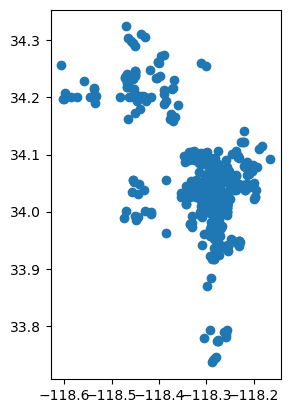

In [96]:
import geopandas as gpd
url = 'https://data.lacity.org/resource/mymu-zi3s.geojson'
gdf = gpd.read_file(url)
gdf.plot()

In [97]:
gpd.read_file?

Signature:
gpd.read_file(
    filename,
    bbox=None,
    mask=None,
    rows=None,
    engine=None,
    **kwargs,
)
Docstring:
Returns a GeoDataFrame from a file or URL.

.. versionadded:: 0.7.0 mask, rows

Parameters
----------
filename : str, path object or file-like object
    Either the absolute or relative path to the file or URL to
    be opened, or any object with a read() method (such as an open file
    or StringIO)
bbox : tuple | GeoDataFrame or GeoSeries | shapely Geometry, default None
    Filter features by given bounding box, GeoSeries, GeoDataFrame or a shapely
    geometry. With engine="fiona", CRS mis-matches are resolved if given a GeoSeries
    or GeoDataFrame. With engine="pyogrio", bbox must be in the same CRS as the
    dataset. Tuple is (minx, miny, maxx, maxy) to match the bounds property of
    shapely geometry objects. Cannot be used with mask.
mask : dict | GeoDataFrame or GeoSeries | shapely Geometry, default None
    Filter for features that intersect wit

<div class="alert alert-block alert-info">
<strong>Exercise:</strong> Choose another dataset on Socrata, download it using the API, and map the results. 
</div>

The City of Los Angeles datasets are [here](https://data.lacity.org). Feel free to choose another city or county if you prefer.

Some possible datasets of planning-related interest:
* [DACA/DAPA workshops](https://data.lacity.org/Community-Economic-Development/Map2-DACA-DAPA-Workshops/icwt-9z3e) (seems a bit dated)
* [Solar PV permits](https://data.lacity.org/A-Prosperous-City/Solar-PV-Permits-in-LA/bdt7-w2xr)
* [Parks](https://data.lacity.org/Community-Economic-Development/Department-of-Recreation-and-Parks-Facility-and-Pa/ax8j-dhzm)

In [ ]:
# your code here

<div class="alert alert-block alert-info">
<h3>What you should have learned</h3>
<ul>
  <li>Gain confidence in experimenting with code - exploring different objects, writing functions, and so on</li>
  <li>Learn how to read API documentation and adapt the examples to create your own queries.</li>
  <li>Gain confidence in mapping the results. We'll practice this much more throughout the quarter.</li>
</ul>
</div>